Exercise 4.10 Part 1
#1. Import ords_prods_customer_combined
#2. Explain security implications/PII that exists in the data 
#3a. Create Region column
#3b. Determine whether there’s a difference in spending habits between the different U.S. regions.
#4. Create an exclusion flag for low-activity customers
#5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.
#6. Create an appropriate visualization to show the distribution of profiles
#7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
#8. Compare your customer profiles with regions and departments.
#9. Produce suitable charts to illustrate your results 
#10. Export final data


In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# define path
path=r'/Users/yeji/Documents/Career Foundry/Achievement 4/Instacart Basket Analysis'

In [3]:
# 1. Import ords_pros_customers_combined
df=pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data','ords_prods_customer_combined.pkl'))

In [4]:
#check data 
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,First Name,Last Name,Gender,State,Age,date_joined,Dependents,Family Status,income,merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both


In [5]:
#check shape
df.shape

(30629741, 35)

In [6]:
#check columns
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', '_exist', 'price_range_loc', 'busiest_day',
       'Busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'days_since_prior_median',
       'frequency_flag', 'First Name', 'Last Name', 'Gender', 'State', 'Age',
       'date_joined', 'Dependents', 'Family Status', 'income', 'merge'],
      dtype='object')

#2 - PII in data
Potential security issue in the data is the PII including First name and the Last name.

In [7]:
#check states
df['State'].value_counts()

California              630308
Pennsylvania            629833
Rhode Island            621341
Georgia                 620618
Arizona                 619810
North Carolina          618268
Oklahoma                615354
Minnesota               613699
New Mexico              611481
Maine                   610309
Alaska                  610279
Wyoming                 609764
Massachusetts           608964
Arkansas                608035
Mississippi             607362
Texas                   605608
North Dakota            605317
Nevada                  605083
Missouri                604383
Virginia                603563
South Dakota            602744
Kansas                  602396
Louisiana               602384
Alabama                 602310
South Carolina          602049
New York                601409
Washington              601352
Montana                 600639
Michigan                600593
Kentucky                600323
Colorado                599764
Oregon                  599340
Delaware

In [8]:
# create regions column 
result = []

for value in df['State']:
  if value == 'Maine' or value =='New Hampshire' or value == 'Vermont'or value =='Massachusetts' or value == 'Rhode Island' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey' or value == 'Connecticut':
    result.append('Northeast')
  elif value == 'Wisconsin' or value == 'Michigan' or value =='Illinois' or value =='Indiana' or value =='Ohio'or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value =='Minnesota' or value == 'Iowa' or value == 'Missouri':
    result.append('Midwest')
  elif value =='Delaware' or value =='Maryland' or value == 'District of Columbia' or value =='Virginia' or value=='West Virginia' or value=='North Carolina' or value=='South Carolina' or value=='Georgia' or value =='Florida' or value =='Kentucky' or value =='Tennessee' or value=='Mississippi' or value =='Alabama' or value=='Oklahoma' or value=='Texas' or value=='Arkansas' or value=='Louisiana':
    result.append('South')
  else:
        result.append('West')

In [9]:
#add regions column to df
df['Regions'] =result

In [10]:
#check value counts
df['Regions'].value_counts()

South        10198982
West          7831810
Midwest       7176924
Northeast     5422025
Name: Regions, dtype: int64

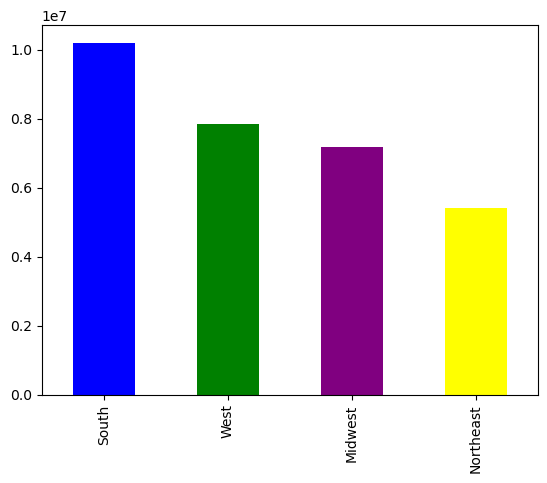

In [11]:
#bar chart for region 
bar_regions = df['Regions'].value_counts().plot.bar(color =['blue', 'green', 'purple','yellow'])

In [12]:
#export bar graph
bar_regions.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regions_bar.png'))

In [13]:
#crosstab between regions and spending flag
crosstab = pd.crosstab(df['Regions'], df['spending_flag'], dropna = False)

In [14]:
#send crosstab to excel
crosstab.to_clipboard()

#3b. difference in spending habits between regions
- according to crosstab data, there is a large difference between low spenders and high spenders in each regions. Only 2 percent of the total spenders and high spenders in each regions. Also, the South region has most spenders compared to other regions.

In [15]:
#create exclusion flag for low activity customer
df.loc[df['order_number'] <5, 'exclusion_flag'] = 'low activity customers'

In [16]:
#check value counts
df['exclusion_flag'].value_counts()

low activity customers    7553641
Name: exclusion_flag, dtype: int64

In [17]:
#4 create subset of low activity customers
df_excluded =  df[df['exclusion_flag']=='low activity customers']

In [18]:
#check shape
df_excluded.shape

(7553641, 37)

In [19]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,Gender,State,Age,date_joined,Dependents,Family Status,income,merge,Regions,exclusion_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,NaN
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,NaN
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,low activity customers
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,NaN
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,NaN


In [20]:
#export subset
df_excluded.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_customer_excluded.pkl'))

In [21]:
#drop excluded customers from the final data
df_new = df.drop(df_excluded.index)

In [22]:
#check shape
df_new.shape

(23076100, 37)

In [23]:
df_new.describe()

,product_id,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,avg_price,days_since_prior_median,Age,Dependents,income
count,2.307610e+07,2.307610e+07,2.307610e+07,2.307610e+07,2.307610e+07,2.307610e+07,2.307610e+07,2.307610e+07,2.307610e+07,2.307610e+07,2.307610e+07,2.307610e+07,2.307610e+07,2.307610e+07,2.307610e+07,2.307610e+07,2.307610e+07,2.307610e+07
mean,2.559405e+04,7.118230e+01,9.926666e+00,1.175683e+01,1.710449e+06,1.029628e+05,2.192653e+01,2.746968e+00,1.336273e+01,1.009216e+01,8.379973e+00,6.931114e-01,3.843879e+01,1.166085e+01,8.959865e+00,4.946644e+01,1.501825e+00,9.991669e+04
std,1.407624e+04,3.823009e+01,6.282801e+00,4.831819e+02,9.873089e+05,5.940643e+04,1.769979e+01,2.083987e+00,4.245123e+00,8.141386e+00,7.163239e+00,4.612028e-01,2.499288e+01,7.475165e+01,5.792920e+00,1.847818e+01,1.118732e+00,4.333860e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,1.353500e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.561650e+05,5.156600e+04,9.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,0.000000e+00,1.800000e+01,7.400221e+00,5.000000e+00,3.400000e+01,1.000000e+00,6.757900e+04
50%,2.524700e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.710643e+06,1.025210e+05,1.600000e+01,3.000000e+00,1.300000e+01,7.000000e+00,6.000000e+00,1.000000e+00,3.300000e+01,7.825000e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.682600e+04
75%,3.793800e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.565257e+06,1.543280e+05,2.900000e+01,5.000000e+00,1.600000e+01,1.300000e+01,1.100000e+01,1.000000e+00,5.200000e+01,8.240640e+00,1.100000e+01,6.500000e+01,3.000000e+00,1.282150e+05
max,4.968800e+04,1.340000e+02,2.100000e+01,9.999900e+04,3.421082e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.370000e+02,1.000000e+00,9.900000e+01,1.500694e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [24]:
#5 new flag - age group 
df_new.loc[df_new['Age'] <39, 'age group'] = 'younger range'
df_new.loc[(df_new['Age'] >38)&(df_new['Age']<60), 'age group'] = 'mid range'
df_new.loc[df_new['Age'] >59, 'age group'] = 'older range'

In [25]:
#check value counts
df_new['age group'].value_counts()

older range      7876519
mid range        7616253
younger range    7583328
Name: age group, dtype: int64

In [26]:
#5 new flag - parental status based on number of dependents - single adult 
df_new.loc[(df_new['age group'] =='younger range')&(df_new['Dependents']==0),'Parental Status']= 'Single Adult'

In [27]:
#5 new flag - parental status based on number of dependents - single adult 
df_new.loc[(df_new['age group'] =='mid range')&(df_new['Dependents']==0),'Parental Status']= 'Single Adult'

In [28]:
#5 new flag - parental status based on number of dependents - single adult 
df_new.loc[(df_new['age group'] =='older range')&(df_new['Dependents']==0),'Parental Status']= 'Single Adult'

In [29]:
#5 new flag - parental status based on number of dependents - young parent
df_new.loc[(df_new['age group'] =='younger range')&(df_new['Dependents']>0),'Parental Status']= 'Young Parent'

In [30]:
#5 new flag - parental status based on number of dependents - older parent
df_new.loc[(df_new['age group'] =='mid range')&(df_new['Dependents']>0),'Parental Status']= 'Older Parent'

In [31]:
#5 new flag - parental status based on number of dependents - older parent
df_new.loc[(df_new['age group'] =='older range')&(df_new['Dependents']>0),'Parental Status']= 'Older Parent'

In [32]:
#check value counts
df_new['Parental Status'].value_counts()

Older Parent    11590319
Single Adult     5766770
Young Parent     5719011
Name: Parental Status, dtype: int64

In [33]:
#average income for each parental status
df_new.groupby('Parental Status')['income'].mean()

Parental Status
Older Parent    114089.476022
Single Adult    100307.530632
Young Parent     70799.608260
Name: income, dtype: float64

In [34]:
# create column for avg income for each parental status
df_new['Avg Income by Parental Status'] = df_new.groupby(['Parental Status'])['income'].transform(np.mean)

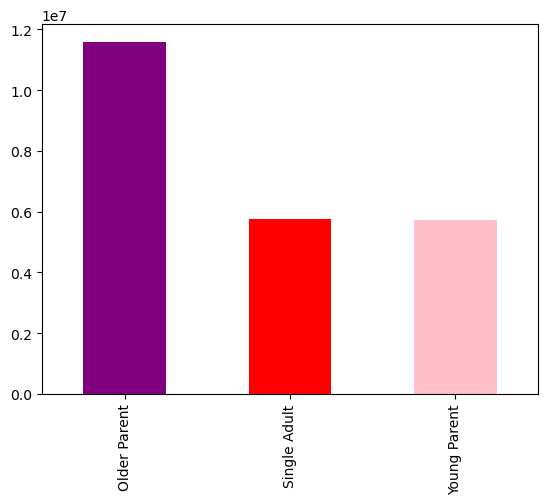

In [35]:
#6 create visualization for the parental status
bar = df_new['Parental Status'].value_counts().plot.bar(color =['purple', 'red', 'pink'])

In [36]:
#export bar chart for parental status
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parental_status.png'))

In [37]:
#7 aggregate max, mean and min for usage frequency
df_new.groupby('Parental Status').agg({'max_order':['mean','min','max']})

max_order        
                      mean min max
Parental Status                   
Older Parent     38.252795   5  99
Single Adult     38.728395   5  99
Young Parent     38.523710   5  99

In [38]:
#7 aggregate max, mean and min for expendature
df_new.groupby('Parental Status').agg({'avg_price':['mean','min','max']})

avg_price                      
                      mean     min           max
Parental Status                                 
Older Parent     11.541233  1.2625   7414.485185
Single Adult     11.901731  1.0000  15006.940000
Young Parent     11.660389  1.0000  10209.987755

In [39]:
#8 crosstab between region and department id 
crosstab = pd.crosstab(df_new['department_id'], df_new['Regions'], dropna = False)

In [40]:
#send crosstab to excel
crosstab.to_clipboard()

#8 any link between region and department id
according to the crosstab between regions and department id, the most popular department id was the same for all four regions, showing that regions doesn't change the popularity of the department. 

In [41]:
# import dept wrangle csv
df_dept=pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data','department_wrangled.csv'),index_col=0)

In [42]:
df_dept

,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


([<matplotlib.axis.XTick at 0x7fe5bd0c6cd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

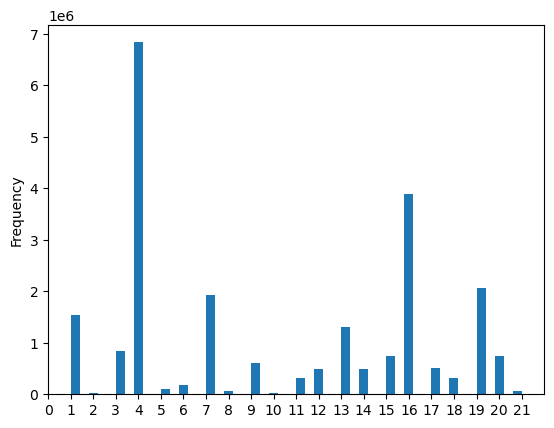

In [43]:
#histogram of department_id
hist = df_new['department_id'].plot.hist(bins = 50)
plt.xticks(range(22))

In [44]:
#export histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_dept_id.png'))

In [45]:
#crosstab between spending flag and loyalty
crosstab_new = pd.crosstab(df['loyalty_flag'], df['spending_flag'], dropna = False)

In [47]:
#crosstab between department_id and loyalty
crosstab_dept = pd.crosstab(df['loyalty_flag'], df['orders_day_of_week'], dropna = False)

In [49]:
#crosstab between loyalty flag and frequency flag
crosstab_loyalty_frequency = pd.crosstab(df['loyalty_flag'], df['frequency_flag'], dropna = False)

In [58]:
#crosstab between family status and frequency
crosstab_fs_frequency= pd.crosstab(df['Family Status'], df['frequency_flag'], dropna = False)

In [61]:
#export final data
df_new.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_data.pkl'))